# Fashion-MNIST

Fashion-MNIST is a dataset of Zalando's article images—consisting of 70,000 examples. Each example is a 28x28 grayscale image described in matrix X and associated with a label from 10 classes contained in the Y.

In [ ]:
import numpy as np
from urllib.request import urlopen
from sklearn.model_selection import train_test_split

def load_fashion_mnist():

    url_base = "https://www.math.unipd.it/~dasan/"
    #With the function "np.frombuffer" we interpret a buffer as a 1-dimensional array.
    Y_train = np.frombuffer(urlopen(url_base + "train-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_train = np.frombuffer(urlopen(url_base + "train-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_train), 784) 
    #We already flatten the data into a vector.
    Y_test = np.frombuffer(urlopen(url_base + "t10k-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_test = np.frombuffer(urlopen(url_base + "t10k-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_test), 784)

    return X_train, Y_train, X_test, Y_test

In [ ]:
X_train_val, Y_train_val, X_test_0, Y_test = load_fashion_mnist() 
X_train_0, X_val_0, Y_train, Y_val = train_test_split(X_train_val, Y_train_val,  train_size = 0.8, random_state = 123)

For the choice of the model, it was decided to split the training dataset into two parts: the training dataset of the models and the validation dataset of themselves. 
This procedure avoids overfitting and, by giving the model "new" data, we are able to observe the true predictive capacity of the model. 
The validation set is also a useful tool for identifying the optimal values for the hyper-parameters.

## Data Analysis

Data preprocessing in Machine Learning is a important step to do before feeding it into our models.
It means the concept of changing the raw data into a clean data set.
The dataset has been preprocessed in order to check missing values and the balance of the sets. Then we looked for a dimensionality reduction in order to make the algorithms faster: we first checked the entropy of the features (each pixel) and we kept those who gave more information, then we applied the PCA technique to reduce the dimensionality of the dataset, increasing interpretability but at the same time minimizing information loss, by creating new uncorrelated variables that successively maximize variance. 
At the end of the process we standardized the resulting dataset with MinMaxScaler to make computations faster and ranges of each features equal to [0,1].







In [ ]:
#Verification of the shapes of the datasets:
print(X_train_0.shape, Y_train.shape, X_val_0.shape, Y_val.shape, X_test_0.shape, Y_test.shape)

(48000, 784) (48000,) (12000, 784) (12000,) (10000, 784) (10000,)


In [ ]:
#Transformation of the sets in DataFrame in order to check the presence of NA values:
import pandas as pd
X_train_df = pd.DataFrame(X_train_0)
X_val_df = pd.DataFrame(X_val_0)
X_test_df = pd.DataFrame(X_test_0)

#Checking for NA values into each dataset:
print(X_train_df.isna().sum().sum())
print(X_val_df.isna().sum().sum())
print(X_test_df.isna().sum().sum())

0
0
0


After seeing that there are no null values, we move on to checking balance of the datasets.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 10
['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 10


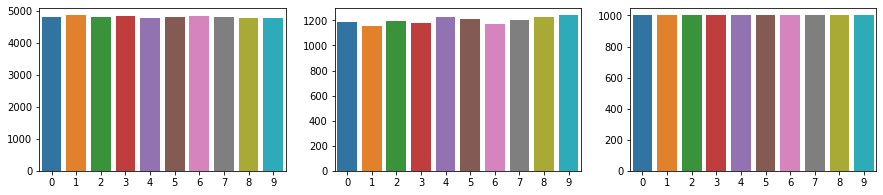

In [ ]:
#Classes contained in the target variable
labels_num = list(set(Y_train))
labels_fashion = ["T-shirt/top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
print(labels_num, len(labels_num))
print(labels_fashion, len(labels_fashion))

#Checking balance of the Training Set:
unique, train_counts = np.unique(Y_train, return_counts = True)
y_train_freq = train_counts

#Checking balance of the Valuation Set:
unique, val_counts = np.unique(Y_val, return_counts = True)
y_val_freq = val_counts

#Checking balance of the Test Set:
unique, test_counts = np.unique(Y_test, return_counts = True)
y_test_freq = test_counts

#Graphic visualization of the frequences in the different datasets:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(15,3))
sns.barplot(y = y_train_freq, x = labels_num, ax = axs[0])
sns.barplot(y = y_val_freq, x = labels_num, ax = axs[1])
sns.barplot(y = y_test_freq, x = labels_num, ax = axs[2])

The following images are an example of some products described in the Fashion MNIST dataset.

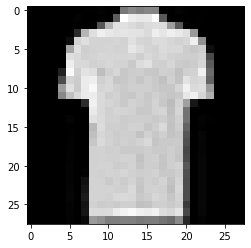

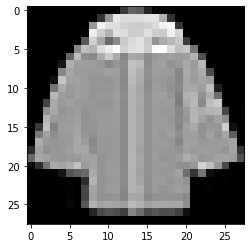

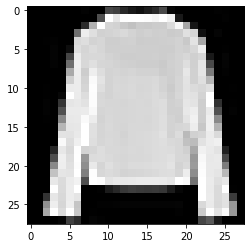

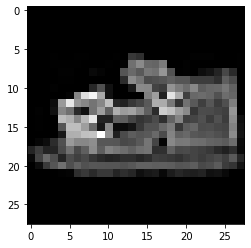

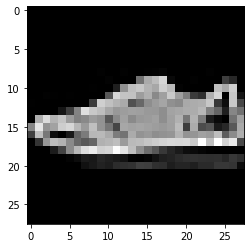

In [ ]:
from matplotlib import image
for i in range(0,5):
  image = X_train_df.iloc[i]
  image = np.array(image)
  image = image.reshape((28,28))
  plt.figure()
  plt.imshow(image, cmap="gray")

Then the entropy values of each feature are evaluated to know if some features are not considerable.

(70000, 784)
9.407700924004722
(48000, 784)
(12000, 784)
(10000, 784)
(48000, 588)
(12000, 588)
(10000, 588)


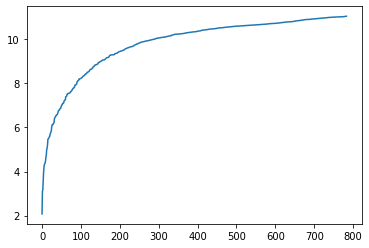

In [ ]:
#Union of the datasets:
data = pd.concat([X_train_df, X_val_df, X_test_df], ignore_index=True)
print(data.shape)

#We look for the pixels that give us more informations, useful in the classification process.
#We compute a measure: the entropy for each feature of each single data: --> each pixel is analyzed
from scipy.stats import entropy
entropy = pd.Series(entropy(data))

#Graphic visualization:
plt.plot(sorted(entropy))

#Now we want to detect the first quantile in order to delete the pixels which don't give us much information:
q = entropy.quantile(q = 0.25)
print(q)
indexes = entropy[entropy < q].index

#Elimination of the columns detected:
data_new = data.drop(indexes, axis = 1)
data_new.shape

X_train_df_new = data_new.iloc[0:48000]
print(X_train_df.shape)

X_val_df_new = data_new.iloc[48000:60000]
print(X_val_df.shape)

X_test_df_new = data_new.iloc[60000:]
print(X_test_df.shape)

X_train = np.array(X_train_df_new)
X_val = np.array(X_val_df_new)
X_test = np.array(X_test_df_new)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

Then the PCA can allow to have a less expensive algorithm and to reduce the number of variables to a smaller number of latent variables.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(48000, 70)
(12000, 70)
(10000, 70)


Finally, because we are working with images, it's good to use the MinMaxScaler on the pixel values to normalize them.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)
X_val = mms.transform(X_val)

##Models

We load the accuracy score that will help us with the evaluation of the models and we build a dataframe where we will insert the values for each model.

In [ ]:
from sklearn.metrics import accuracy_score
models_scores = {}
models_scores = pd.DataFrame(models_scores, index = ["SCORE"])
models_scores

""
SCORE


#### SVM

(Execution Time: 3 min)

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state = 123)
svc.fit(X_train, Y_train)

Y_pred_svc_train = svc.predict(X_train)
Y_pred_svc_val = svc.predict(X_val)

acc_svc_train = accuracy_score(Y_train, Y_pred_svc_train)
acc_svc_val = accuracy_score(Y_val, Y_pred_svc_val)
print("ACCURACY: TRAIN = "+str(acc_svc_train)+" VAL = "+str(acc_svc_val))


ACCURACY: TRAIN = 0.9279375 VAL = 0.8946666666666667


In [ ]:
Y_pred_svc_test = svc.predict(X_test)
acc_svc_test = accuracy_score(Y_test, Y_pred_svc_test)

models_scores["SVM"] = acc_svc_test
models_scores

,SVM
SCORE,0.8851


#### K Nearest Neighbors

(Execution Time: 5 min)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Ks = [2,3,4,5,7,10]

for k in Ks:
  print("k="+str(k))
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, Y_train)

  Y_pred_train = knn.predict(X_train)
  Y_pred_val = knn.predict(X_val)

  acc_knn_train = accuracy_score(Y_train, Y_pred_train)
  acc_knn_val = accuracy_score(Y_val, Y_pred_val)

  print("ACCURACY: TRAIN = %f VAL = %f" % (acc_knn_train, acc_knn_val)) 

k=2
ACCURACY: TRAIN = 0.927896 VAL = 0.844000
k=3
ACCURACY: TRAIN = 0.920312 VAL = 0.856000
k=4
ACCURACY: TRAIN = 0.909271 VAL = 0.860667
k=5
ACCURACY: TRAIN = 0.903312 VAL = 0.863417
k=7
ACCURACY: TRAIN = 0.892604 VAL = 0.862667
k=10
ACCURACY: TRAIN = 0.885271 VAL = 0.860500


In [ ]:
#We choose the best model of them for the final choice using the test set:
#from the results below we can see that the model that predicts in a better way is the K-Nearest Neighbors algorithm with the 
#parameter "number of neighbors" set equal to 10.

knn10 = KNeighborsClassifier(n_neighbors = 10)
knn10.fit(X_train, Y_train)

Y_pred_test = knn10.predict(X_test)
acc_knn_test = accuracy_score(Y_test, Y_pred_test)

models_scores["KNN_10"] = acc_knn_test
models_scores

,SVM,KNN_10
SCORE,0.8851,0.8584


#### Random Forest

(Execution Time: < 1 min)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(random_state = 123, max_depth = 10)
rforest.fit(X_train, Y_train)

Y_pred_rforest_train = rforest.predict(X_train)
Y_pred_rforest_val = rforest.predict(X_val)

acc_rforest_train = accuracy_score(Y_train, Y_pred_rforest_train)
acc_rforest_val = accuracy_score(Y_val, Y_pred_rforest_val)

print("ACCURACY: TRAIN = %f VAL = %f" % (acc_rforest_train, acc_rforest_val))

ACCURACY: TRAIN = 0.869875 VAL = 0.836417


In [ ]:
Y_pred_rforest_test = rforest.predict(X_test)
acc_rforest_test = accuracy_score(Y_test, Y_pred_rforest_test)

models_scores["Random_Forest"] = acc_rforest_test
models_scores

,SVM,KNN_10,Random_Forest
SCORE,0.8851,0.8584,0.8212


#### Bagging Classifier

(Execution Time: 20 min)

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator = SVC(), random_state = 123)
bagg.fit(X_train,Y_train)

Y_pred_bagg_train = bagg.predict(X_train)
Y_pred_bagg_val = bagg.predict(X_val)

acc_bagg_train = accuracy_score(Y_train, Y_pred_bagg_train)
acc_bagg_val = accuracy_score(Y_val, Y_pred_bagg_val)

print("ACCURACY: TRAIN = %f VAL = %f" % (acc_bagg_train, acc_bagg_val))

ACCURACY: TRAIN = 0.926583 VAL = 0.895500


In [ ]:
Y_pred_bagg_test = bagg.predict(X_test)
acc_bagg_test = accuracy_score(Y_test, Y_pred_bagg_test)

models_scores["BaggingClassifier"] = acc_bagg_test
models_scores

,SVM,KNN_10,Random_Forest,BaggingClassifier
SCORE,0.8851,0.8584,0.8212,0.8855


#### Stacking Classifier

(Execution Time: 11 min)

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [('svc', svc), ('knn10', knn10)]
stk = StackingClassifier(estimators = estimators, final_estimator = RandomForestClassifier())
stk.fit(X_train,Y_train)

Y_pred_stk_train = stk.predict(X_train)
Y_pred_stk_val = stk.predict(X_val)

acc_stk_train = accuracy_score(Y_train, Y_pred_stk_train)
acc_stk_val = accuracy_score(Y_val, Y_pred_stk_val)

print("ACCURACY: TRAIN = %f VAL = %f" % (acc_stk_train, acc_stk_val))

ACCURACY: TRAIN = 0.943937 VAL = 0.892750


In [ ]:
Y_pred_stk_test = stk.predict(X_test)
acc_stk_test = accuracy_score(Y_test, Y_pred_stk_test)

models_scores["StackingClassifier"] = acc_stk_test
models_scores

,SVM,KNN_10,Random_Forest,BaggingClassifier,StackingClassifier
SCORE,0.8851,0.8584,0.8212,0.8855,0.8846


#### Neural Network

(Execution Time: 3 min)

In [ ]:
import tensorflow #the backend used by Keras (there are different beckend)
from tensorflow.keras.models import Sequential #import the type of mpdel: sequential (e.g., MLP)
from tensorflow.keras.layers import Input, Dense #simple linear layer
from tensorflow.keras.utils import to_categorical # transformation for classification labels
from keras.utils.vis_utils import plot_model
from tensorflow.python.framework.random_seed import set_random_seed
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [ ]:
feature_vector_length = 70
num_classes = 10

Y_train_cat = to_categorical(Y_train, num_classes)
Y_val_cat = to_categorical(Y_val, num_classes)
Y_test_cat = to_categorical(Y_test, num_classes)

np.random.seed(123)
set_random_seed(2)

In [ ]:
es = EarlyStopping(monitor='val_loss', #quantity to be monitored
                   mode='min', #we look for decreasing patterns stop 
                   patience = 3, #number of epochs with no improvement
                   verbose=1)

In [ ]:
model = Sequential()

model.add(Dense(input_dim = feature_vector_length, units = 50, activation = "relu"))
model.add(Dropout(0.4))

model.add(Dense(units = num_classes, activation = "softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train, Y_train_cat, validation_data = (X_val, Y_val_cat), epochs = 500, batch_size = 500, callbacks=[es])

Epoch 1/500
96/96 [==============================] - 1s 6ms/step - loss: 2.3571 - accuracy: 0.1061 - val_loss: 2.2883 - val_accuracy: 0.1182
Epoch 2/500
96/96 [==============================] - 0s 4ms/step - loss: 2.2983 - accuracy: 0.1180 - val_loss: 2.2692 - val_accuracy: 0.1523
Epoch 3/500
96/96 [==============================] - 0s 4ms/step - loss: 2.2744 - accuracy: 0.1387 - val_loss: 2.2554 - val_accuracy: 0.1992
Epoch 4/500
96/96 [==============================] - 0s 4ms/step - loss: 2.2600 - accuracy: 0.1557 - val_loss: 2.2431 - val_accuracy: 0.2529
Epoch 5/500
96/96 [==============================] - 0s 4ms/step - loss: 2.2465 - accuracy: 0.1775 - val_loss: 2.2314 - val_accuracy: 0.2938
Epoch 6/500
96/96 [==============================] - 0s 4ms/step - loss: 2.2345 - accuracy: 0.1979 - val_loss: 2.2197 - val_accuracy: 0.3282
Epoch 7/500
96/96 [==============================] - 0s 4ms/step - loss: 2.2229 - accuracy: 0.2134 - val_loss: 2.2073 - val_accuracy: 0.3623
Epoch 8/500
9

In [ ]:
NeuralNetwork = model.evaluate(X_test, Y_test_cat, verbose = 1)
models_scores["NeuralNetwork"] = NeuralNetwork[1]
models_scores

313/313 [==============================] - 1s 2ms/step - loss: 0.5728 - accuracy: 0.7993


,SVM,KNN_10,Random_Forest,BaggingClassifier,StackingClassifier,NeuralNetwork
SCORE,0.8851,0.8584,0.8212,0.8855,0.8846,0.7993


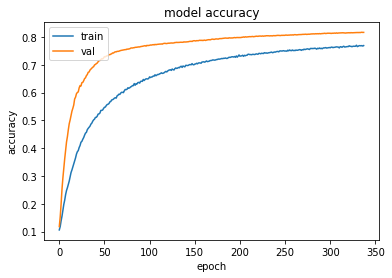

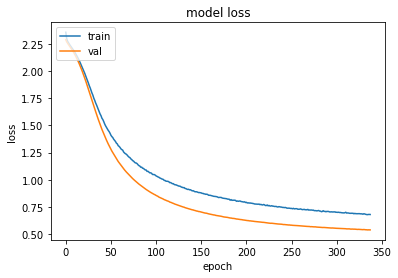

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Best Model

We choose the best model for this dataset looking at the accuracy score and the eventual presence of overfitting.
The best model turned out to be the SVM classifier with an accuracy of 0.885.


In [ ]:
labels = {}
labels = pd.DataFrame(labels, index = ["Name"])
for i in range(0,10) :
  labels[labels_num[i]] = labels_fashion[i]
labels

,0,1,2,3,4,5,6,7,8,9
Name,T-shirt/top,Trousers,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot


We can observe the confusion matrix for the comparison of the real values of the labels with those predicted by the SVM model.

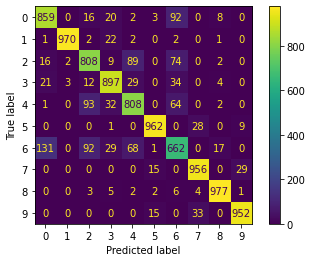

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, svc.predict(X_test), labels = labels_num)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels_num)
disp.plot()
plt.show()

After noticing from the confusion matrix that the product 6 (Shirt) has more prediction errors than others, let's see some examples of how they were predicted.

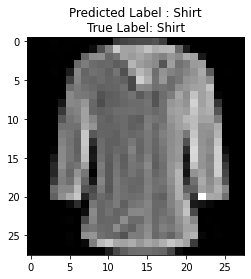

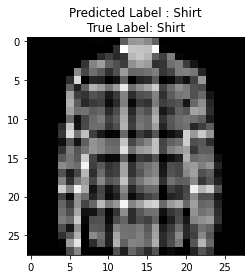

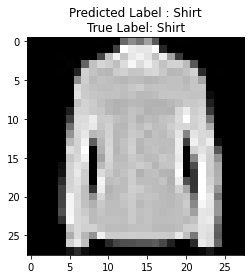

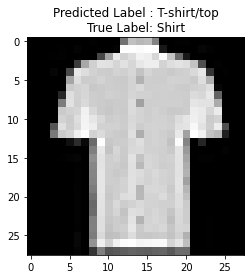

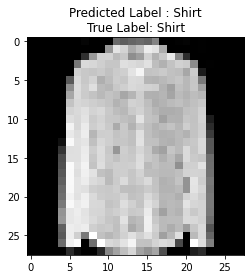

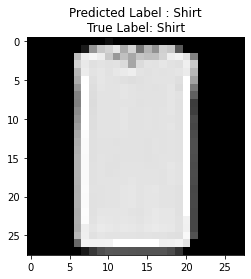

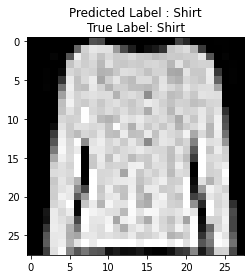

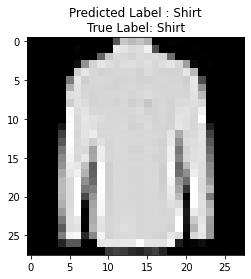

In [ ]:
from matplotlib import image
n = 0
while(n<=5):
  for i in range(0,100):
    if Y_test[i] == 6:
      image_test = X_test_df.iloc[i]
      image_test = np.array(image_test)
      image_test = image_test.reshape((28,28))

      label_pred = Y_pred_svc_test[i]
      label_pred = labels_fashion[label_pred]
      label_true = Y_test[i]
      label_true = labels_fashion[label_true]
      plt.figure()
      plt.title("Predicted Label : %s\nTrue Label: %s" % (label_pred, label_true))
      plt.imshow(image_test, cmap="gray")
      n += 1
  